# Load Modules

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from rdkit import Chem


import json
import contextlib
from io import StringIO


from utils import process_msms, bin_msms, generate_fingerprint

/home/seresne/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [2]:
f = open('data/MoNA-export-LC-MS-MS_Spectra.json')

data = json.load(f)

f.close()
print("Total number of spectra: ", len(data))

Total number of spectra:  145379


# Process Data

In [41]:
all_msms = []
all_fps = []
failed_fps = []
error_msgs = StringIO()

for i, x in enumerate(tqdm(data)):

    msms = x['spectrum']
    mz_array, intensity_array = process_msms(msms)

    # skip msms with mz > 1000
    if max(mz_array) > 1000: 
        continue

    msms_vec = bin_msms(mz_array, intensity_array)

    # Hide Rdkit error messages4
    with contextlib.redirect_stderr(error_msgs):
        
        try:
            for mD in x['compound'][0]['metaData']:
                if mD['name'] == 'SMILES':
                    smiles = mD['value']
                    break
            fp = generate_fingerprint(smiles)
        except:
            failed_fps.append(i)
            continue

    all_msms.append(msms_vec)
    all_fps.append(fp)

print("Number of msms and fps processed: ", len(all_fps))
print("Number of failed instances: ", len(failed_fps))
error_msgs = error_msgs.getvalue();

100%|██████████████████████████████████| 145379/145379 [04:35<00:00, 527.82it/s]

Number of msms and fps processed:  134586
Number of failed instances:  50


In [40]:
error_msgs

"[12:35:22] SMILES Parse Error: unclosed ring for input: 'OC1=CC(C(OC)=O)=C(OC2=CC(C)=CC(O)=C2C(O)=O)C(OC)=C2'\n[12:35:22] SMILES Parse Error: unclosed ring for input: 'O=C1C2=C(C=C(C)C=C2O)OC3=CC(O)=CC(C(OC)=O)=C32'\n[12:35:22] SMILES Parse Error: unclosed ring for input: 'O=C([C@H](CC)C)O[C@H]1CCC=C2C1[C@@H](CC[C@@H](O)C[C@@H](O)CC(OC)=O)[C@@H](C)C=C3'\n[12:35:22] SMILES Parse Error: unclosed ring for input: 'O=C(N[C@@H](CCCCCC(CC)=O)C(N[C@@H](CC1=CN(OC)C2=C1C=CC=C2)C3=O)=O)[C@@H]4N(C([C@H]([C@H](CC)C)N3)=O)CCCC5'\n[12:35:22] SMILES Parse Error: unclosed ring for input: 'O=C(N(C(C=CC=C1)=C1C(N(C)[C@@]2([H])CC3=CC=CC=C3)=O)C2=N4)C5=C4C=CC=C6'\n[12:35:22] SMILES Parse Error: unclosed ring for input: 'OC1=CC=C(CC(C(NC(C(CC)C)C(OC(C(CCCCCCCCCC)C)CC(NC(C(NC(C(NC(C(NC2CCC(N)=O)=O)C)=O)C)=O)C(O)C)=O)=O)=O)NC2=O)C=C2'\n"

In [44]:
with open("data/msms.pkl", 'wb') as f:
    pickle.dump(all_msms, f)
with open("data/fps_maccs.pkl", 'wb') as f:
    pickle.dump(all_fps, f)

# Reload Data

In [4]:
all_msms = None
all_fps = None
with open("data/msms.pkl", 'rb') as f:
    all_msms = pickle.load(f)
with open("data/fps_maccs.pkl", 'rb') as f:
    all_fps = pickle.load(f)

# Evaluate distribution

In [5]:
all_fps = np.array(all_fps)

(0.0, 167.0)

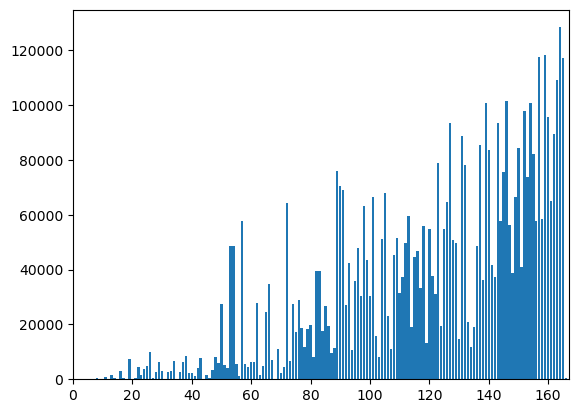

In [6]:
plt.bar(np.arange(len(all_fps[0])), np.sum(all_fps, 0))
plt.xlim([0, 167])

# Visualize fingerprints

In [1]:
from pyvis.network import Network

In [2]:
from rdkit.Chem import MACCSkeys
from rdkit import Chem
from rdkit.Chem import Draw

In [7]:
mols = []
for _id, patt in MACCSkeys.smartsPatts.items():
    if patt[0] != '?':
        m = Chem.MolFromSmarts(patt[0])
        mols.append((_id, m))

In [8]:
matrix = np.zeros((len(MACCSkeys.smartsPatts)+1, len(MACCSkeys.smartsPatts)+1))

In [9]:
for i, mol_i in mols:
    for j, mol_j in mols:
        if i!=j:
            try:
                if mol_i.HasSubstructMatch(mol_j):
                    print(i, j)
                    matrix[i][j] = 1
            except:
                continue

2 44
3 44
4 44
5 44
6 44
7 44
8 11
8 44
8 124
8 130
9 44
10 44
11 8
11 44
11 124
11 130
12 44
13 71
13 94
13 102
13 122
13 124
13 130
13 140
13 142
13 146
13 148
13 159
13 161
13 164
14 67
14 88
14 124
14 130
15 106
15 123
15 140
15 146
15 159
15 164
16 22
16 44
16 124
16 130
18 44
19 44
19 124
19 130
21 44
21 76
21 99
22 16
22 44
22 124
22 130
23 106
23 110
23 117
23 123
23 140
23 142
23 146
23 156
23 159
23 161
23 164
24 71
24 94
24 102
24 124
24 130
24 140
24 142
24 146
24 159
24 161
24 164
25 77
25 106
25 142
25 156
25 161
26 21
26 44
26 76
26 99
27 134
28 44
28 138
28 153
30 44
30 112
30 124
30 130
30 148
31 44
31 124
31 130
32 33
32 67
32 88
32 94
32 124
32 130
32 142
32 161
33 67
33 88
33 94
33 124
33 130
33 142
33 161
34 44
35 44
36 88
37 77
37 106
37 110
37 117
37 140
37 142
37 146
37 156
37 159
37 161
37 164
38 77
38 142
38 156
38 161
39 48
39 55
39 58
39 61
39 67
39 88
39 102
39 106
39 124
39 130
39 140
39 146
39 148
39 159
39 164
40 67
40 88
40 102
40 124
40 130
40 140
40 1

[12:54:33] 

****
Pre-condition Violation
RingInfo not initialized
Violation occurred on line 52 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/RingInfo.cpp
Failed Expression: df_init
****

[12:54:33] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 297 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
****

[12:54:33] 

****
Pre-condition Violation
RingInfo not initialized
Violation occurred on line 52 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/RingInfo.cpp
Failed Expression: df_init
****

[12:54:33] 

****
Pre-condition Violation
RingInfo not initialized
Violation occurred on line 52 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/RingInfo.cpp
Failed Expression: df_init
****

[12:54:

105 148
106 44
106 124
106 130
106 148
107 44
107 106
107 124
107 130
107 148
108 28
108 44
108 93
108 124
108 130
108 138
108 141
108 149
108 153
108 160
109 28
109 44
109 138
109 140
109 146
109 153
109 159
109 164
110 117
110 140
110 142
110 146
110 159
110 161
110 164
111 28
111 44
111 94
111 124
111 130
111 138
111 142
111 153
111 161
112 44
112 106
112 124
112 130
112 148
113 44
113 102
113 124
113 130
113 140
113 146
113 159
113 164
114 44
114 138
114 141
114 149
114 153
114 160
115 28
115 44
115 93
115 138
115 141
115 149
115 153
115 160
116 44
117 44
117 94
117 102
117 124
117 130
117 140
117 142
117 146
117 159
117 161
117 164
118 44
119 44
119 94
119 124
119 130
119 142
119 161
120 44
121 142
121 161
122 44
122 70
122 94
122 106
122 124
122 130
122 142
122 148
122 161
123 140
123 146
123 159
123 164
124 44
124 130
126 44
126 102
126 124
126 130
126 140
126 146
126 159
126 164
127 44
127 102
127 124
127 130
127 140
127 146
127 159
127 164
128 44
129 44
130 44
130 124
131 44
1

[12:54:33] 

****
Pre-condition Violation
RingInfo not initialized
Violation occurred on line 129 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/RingInfo.cpp
Failed Expression: df_init
****

[12:54:33] 

****
Pre-condition Violation
RingInfo not initialized
Violation occurred on line 52 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/RingInfo.cpp
Failed Expression: df_init
****

[12:54:33] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 297 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
****

[12:54:33] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 297 in file /home/conda/feedstock_root/build_artifacts/rdkit_1666712883380/work/Code/GraphMol/At

In [10]:
edges = np.where(matrix==1)

In [11]:
net = Network(directed =True)
for i, parent in enumerate(edges[0]):
    child = edges[1][i]

    parent = str(parent)
    child = str(child)
    
    net.add_node(parent, label=parent)
    net.add_node(child, label=child)

    net.add_edge(parent, child)
    net.toggle_physics(True)

In [12]:
net.toggle_physics(True)
net.show('nx.html')

2


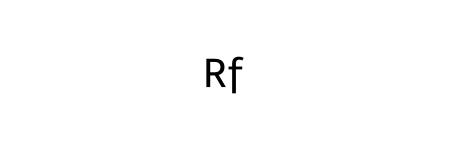

3


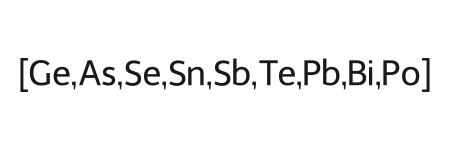

4


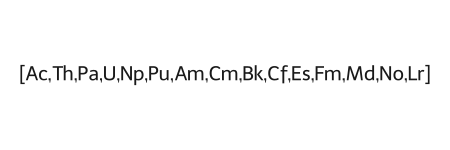

5


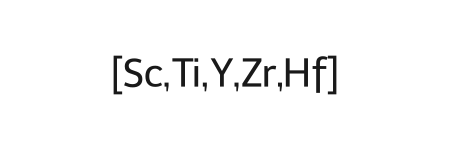

6


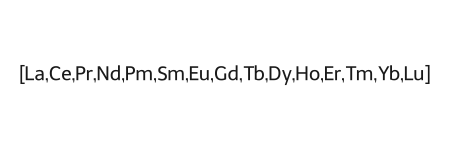

7


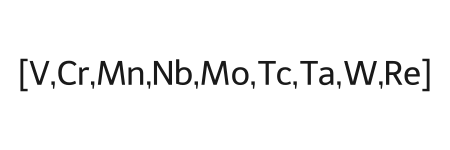

8


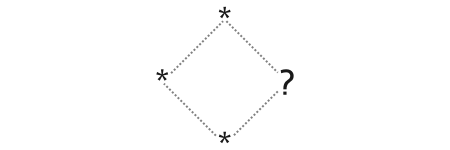

9


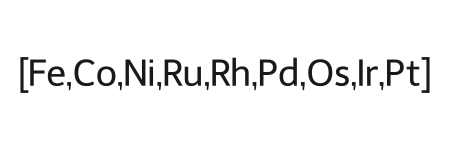

10


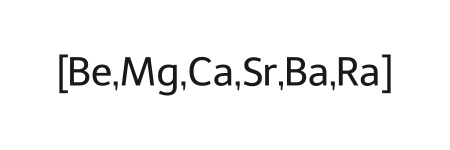

11


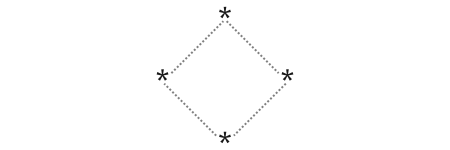

12


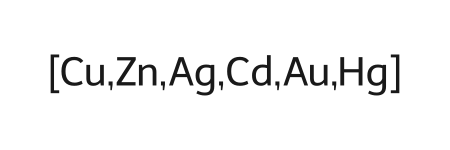

13


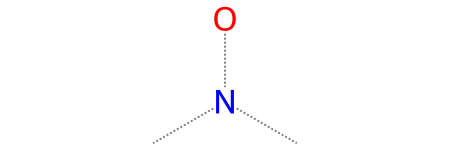

14


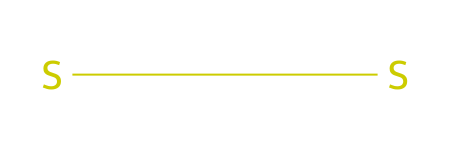

15


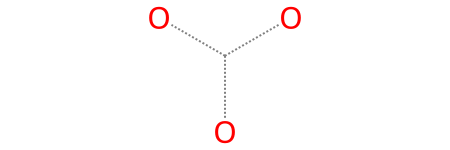

16


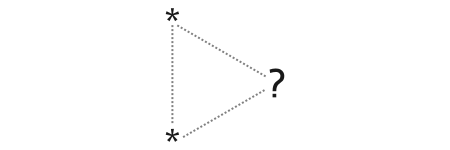

17


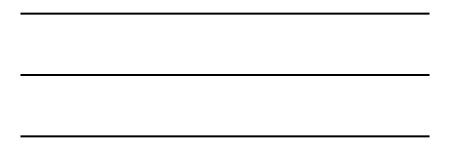

18


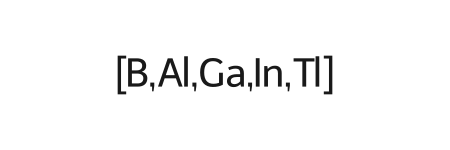

19


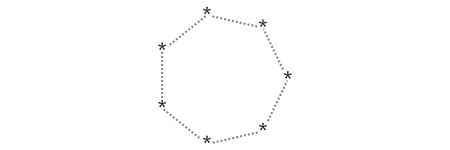

20


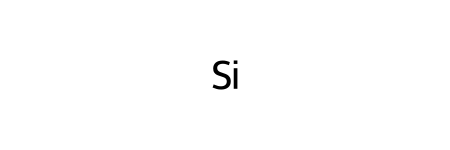

21


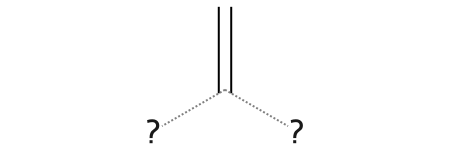

22


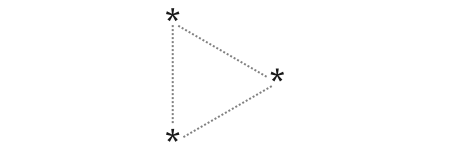

23


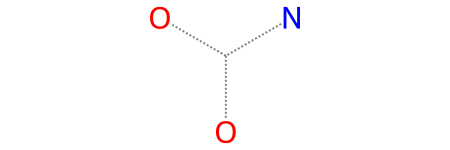

24


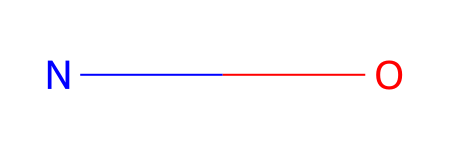

25


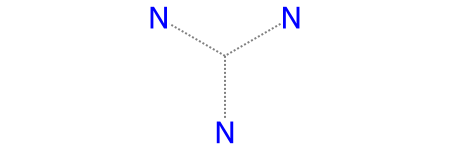

26


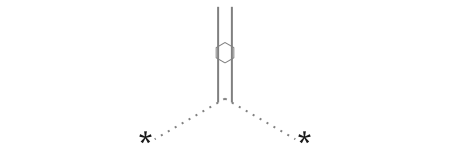

27


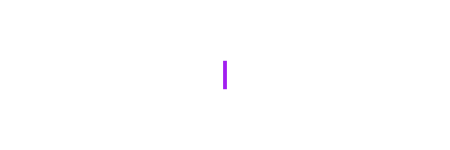

28


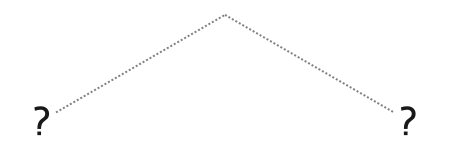

29


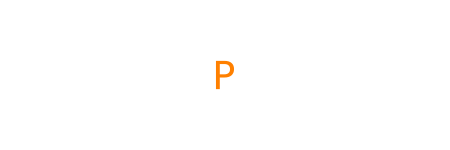

30


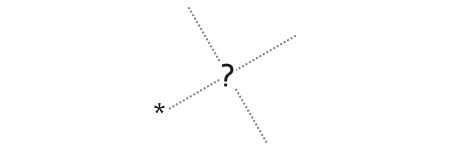

31


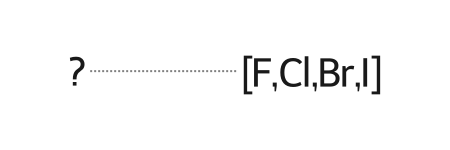

32


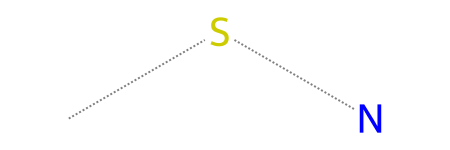

33


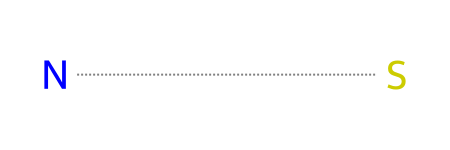

34


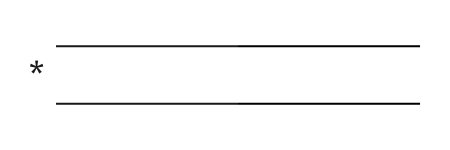

35


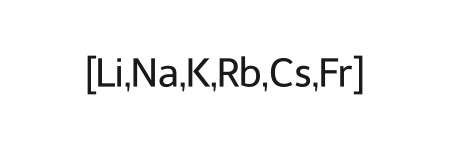

36


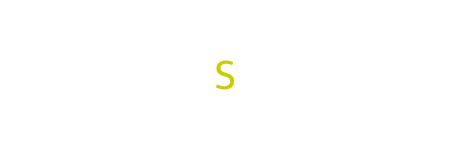

37


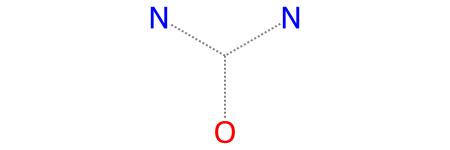

38


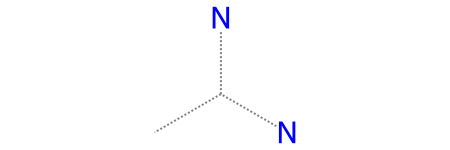

39


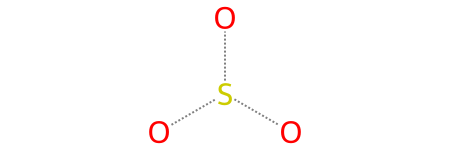

40


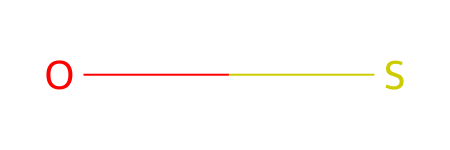

41


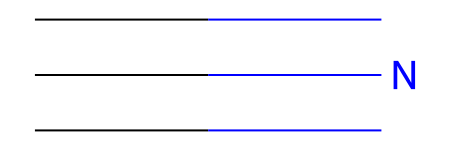

42


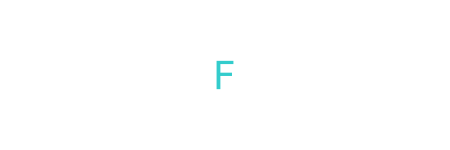

43


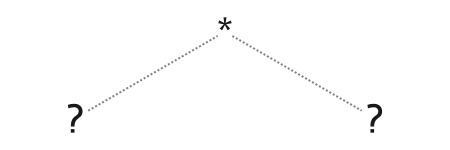

44


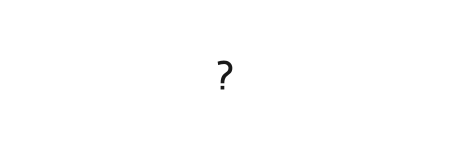

45


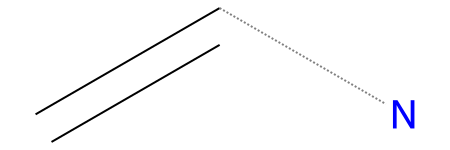

46


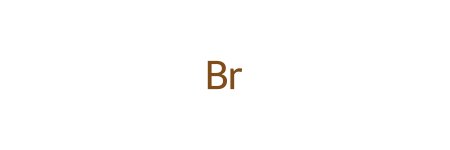

47


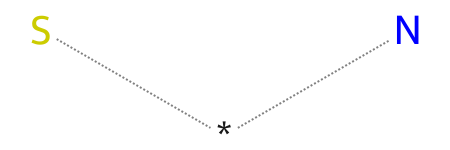

48


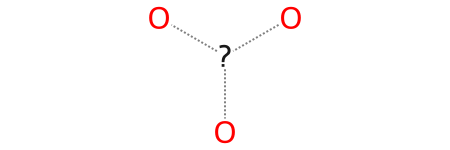

49


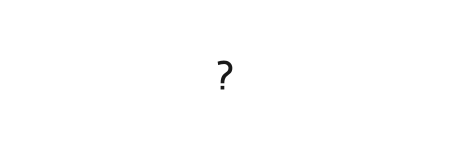

50


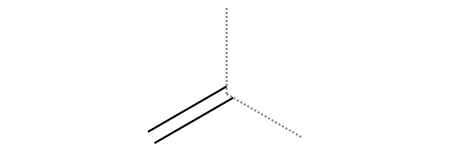

51


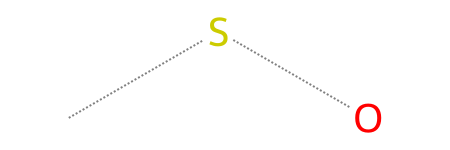

52


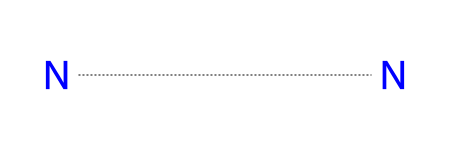

53


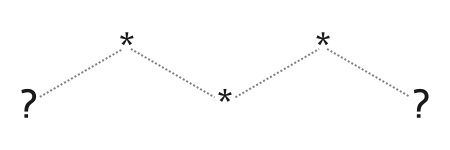

54


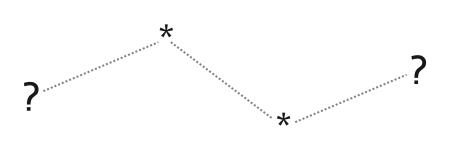

55


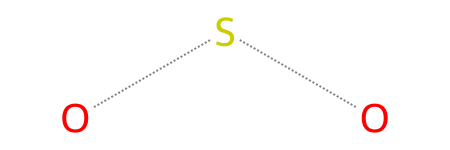

56


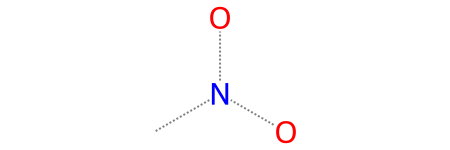

57


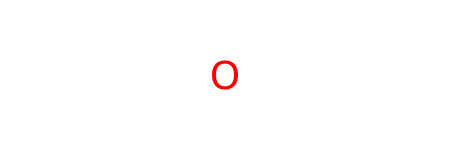

58


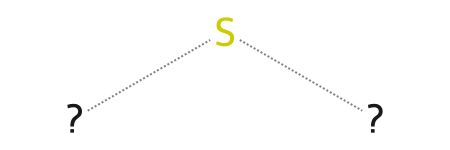

59


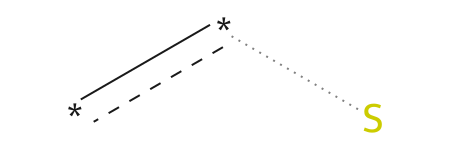

60


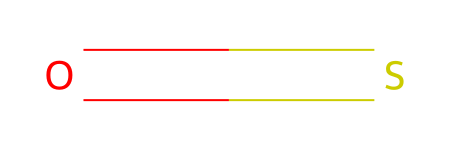

61


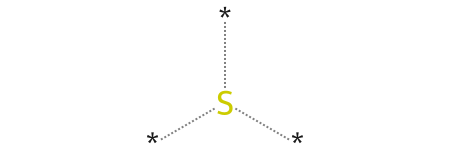

62


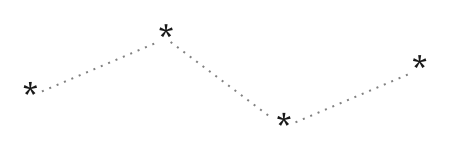

63


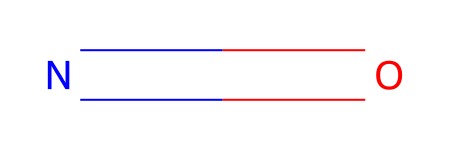

64


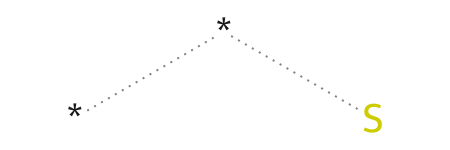

65


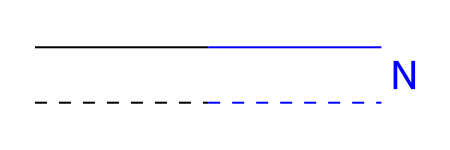

66


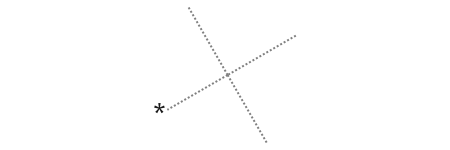

67


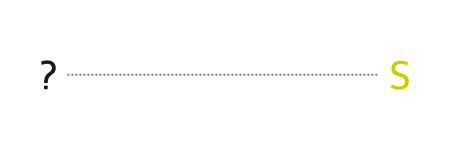

68


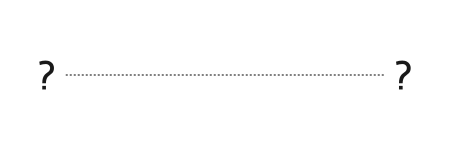

69


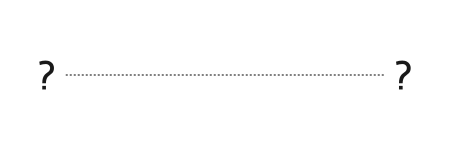

70


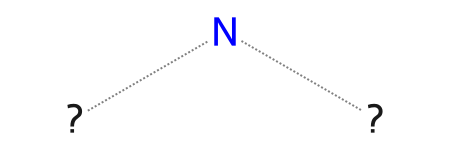

71


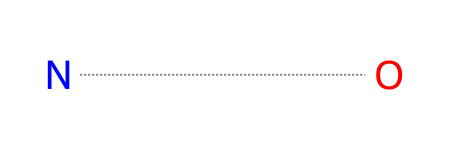

72


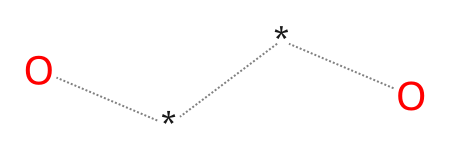

73


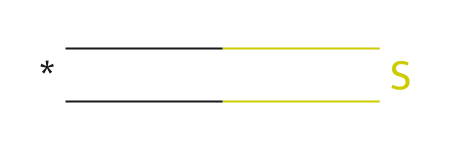

74


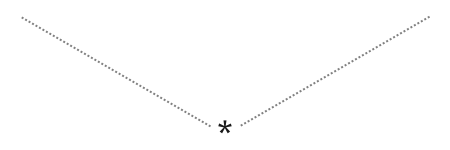

75


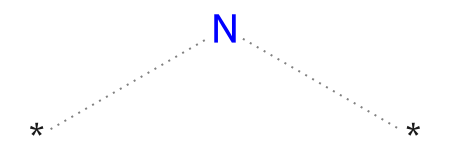

76


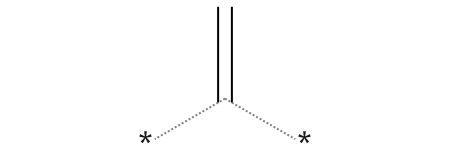

77


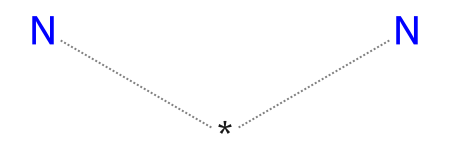

78


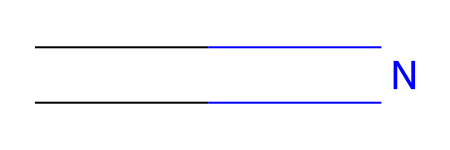

79


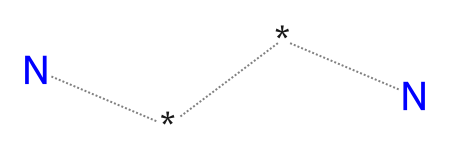

80


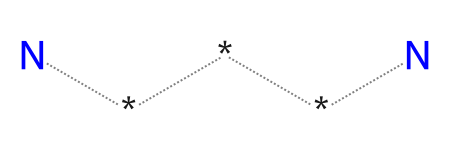

81


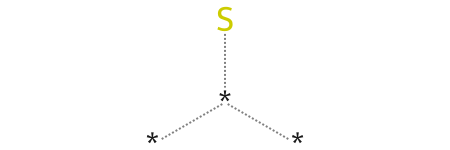

82


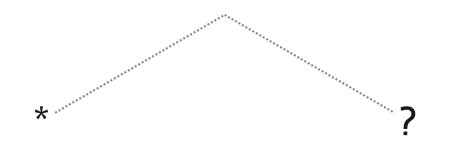

83


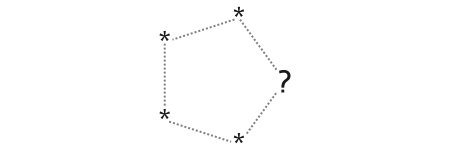

84


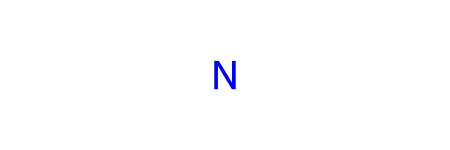

85


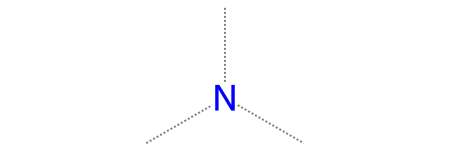

86


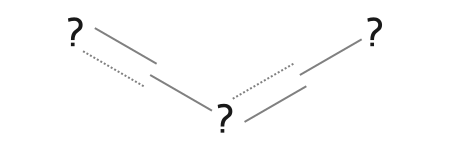

87


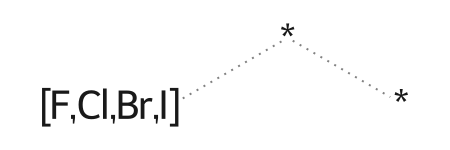

88


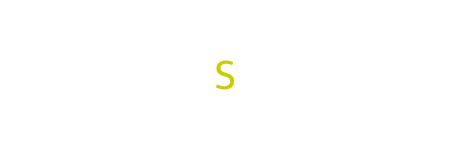

89


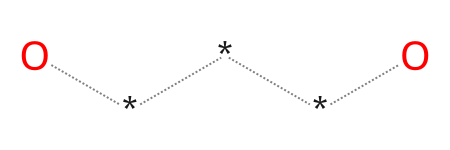

90


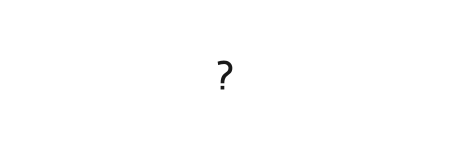

91


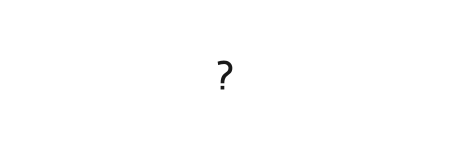

92


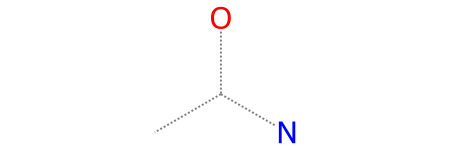

93


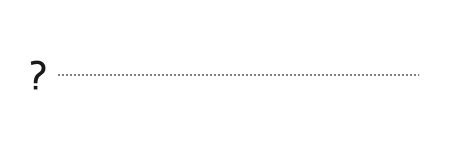

94


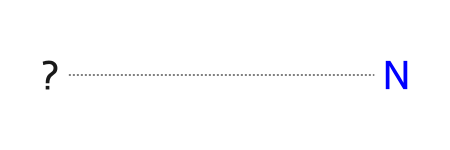

95


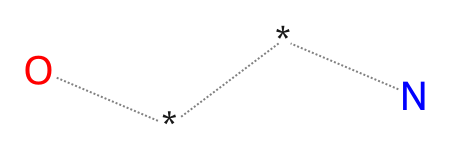

96


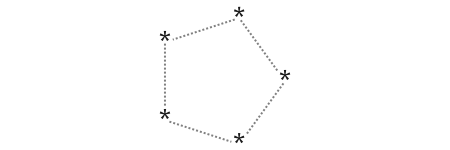

97


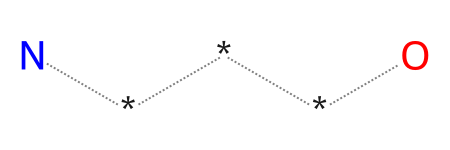

98


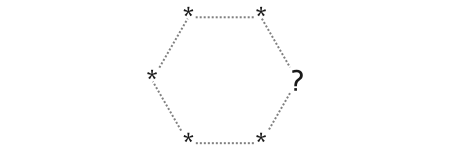

99


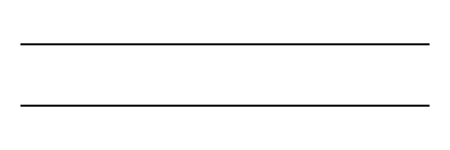

100


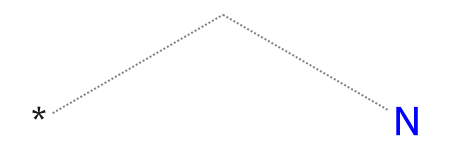

101


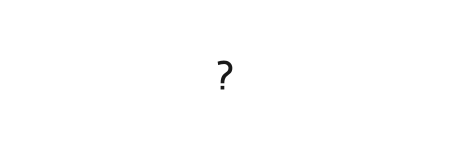

102


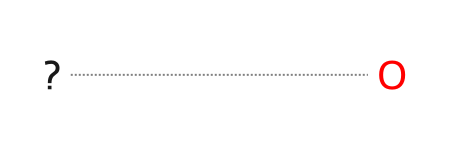

103


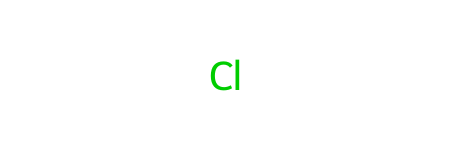

104


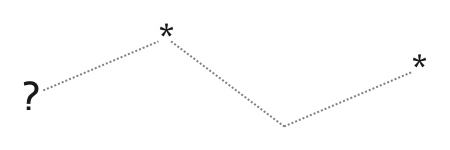

105


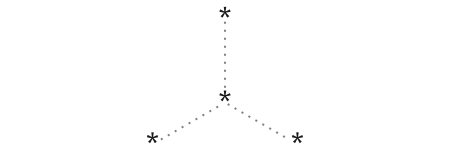

106


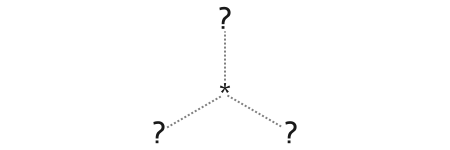

107


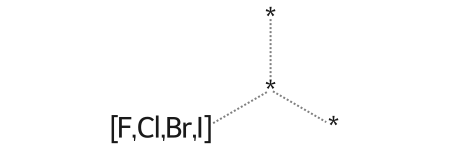

108


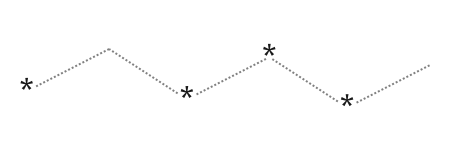

109


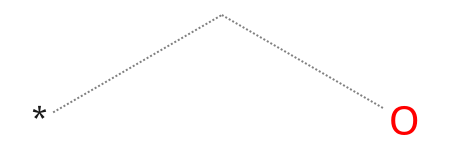

110


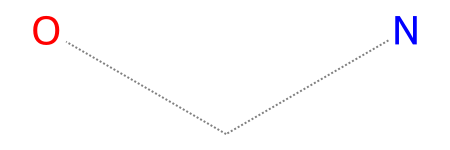

111


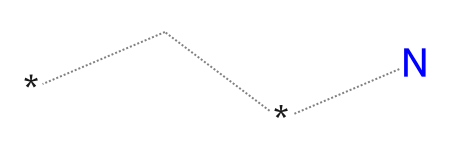

112


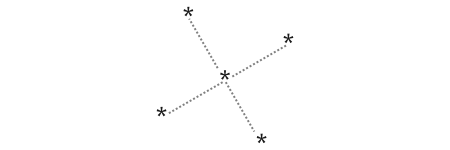

113


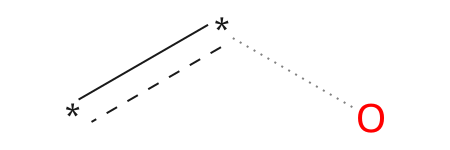

114


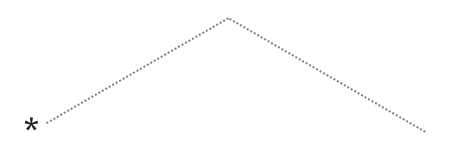

115


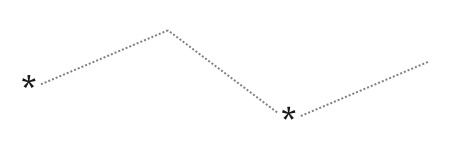

116


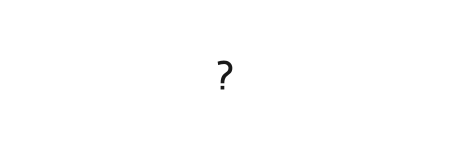

117


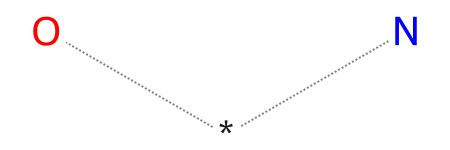

118


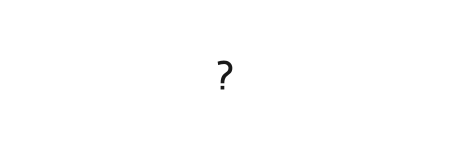

119


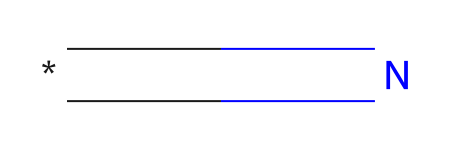

120


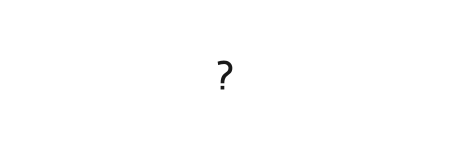

121


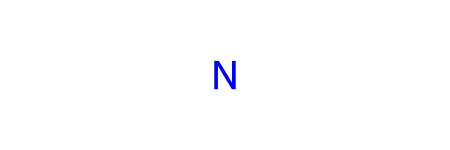

122


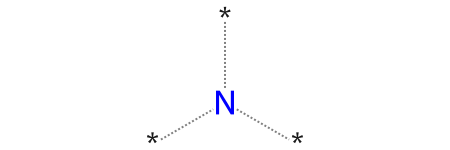

123


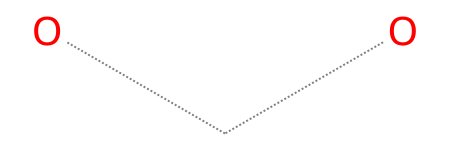

124


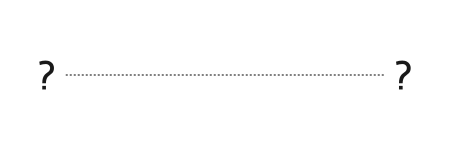

126


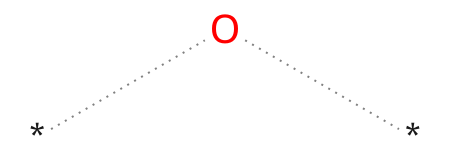

127


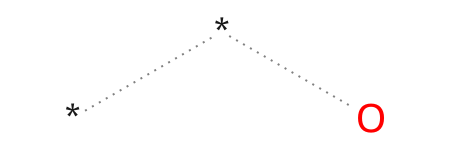

128


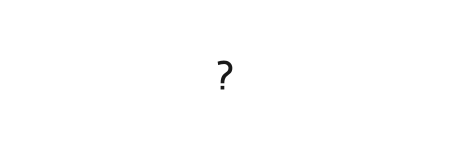

129


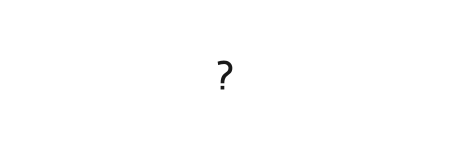

130


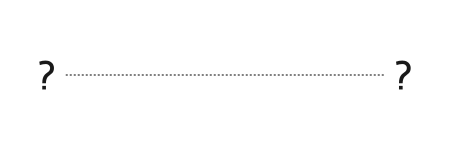

131


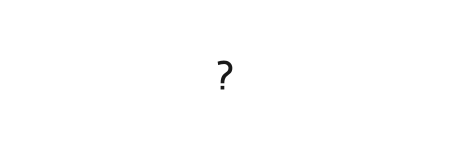

132


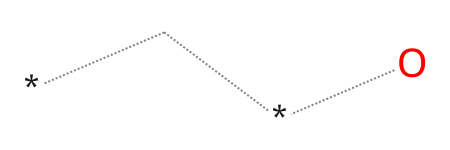

133


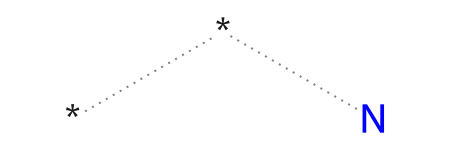

134


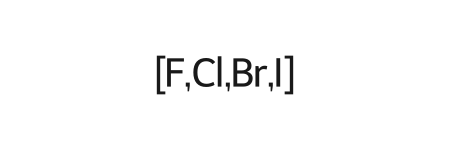

135


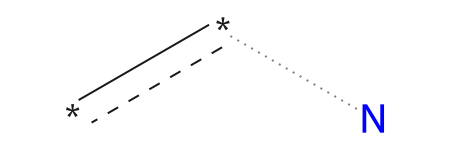

136


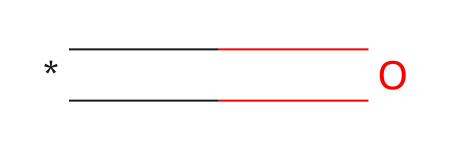

137


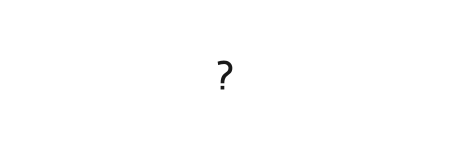

138


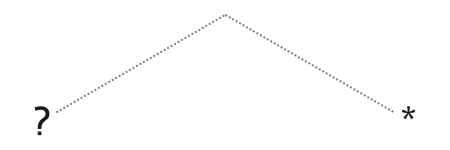

139


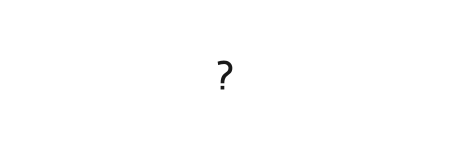

140


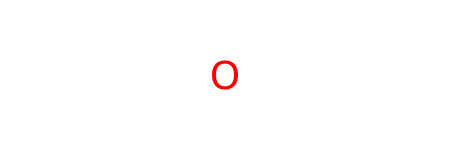

141


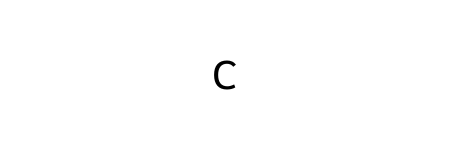

142


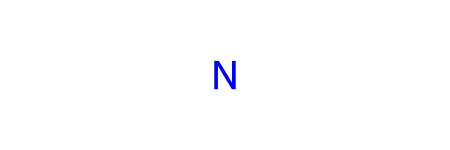

143


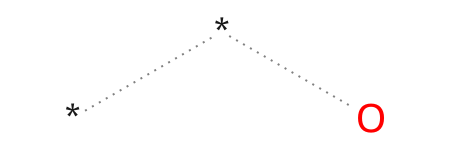

144


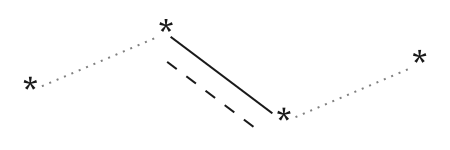

145


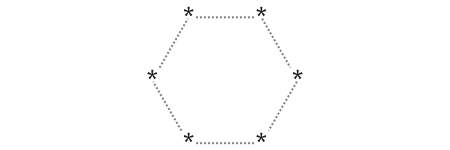

146


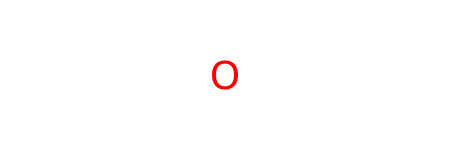

147


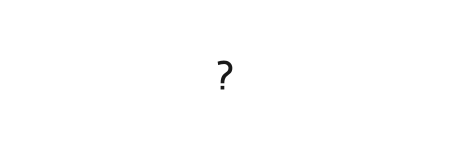

148


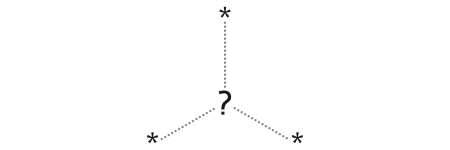

149


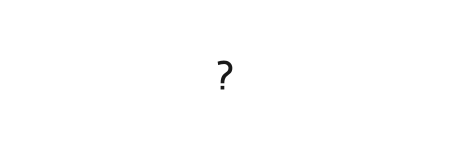

150


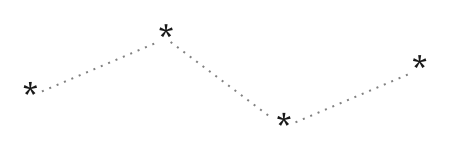

151


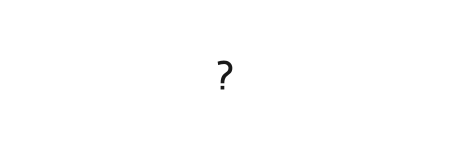

152


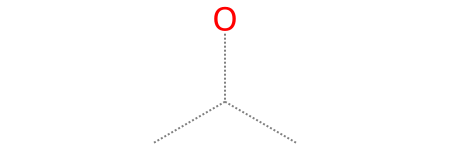

153


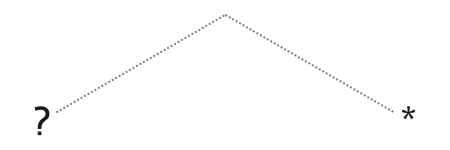

154


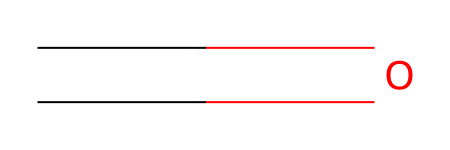

155


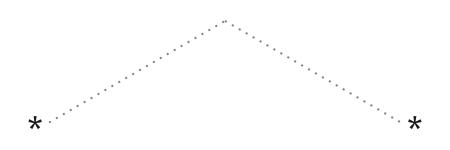

156


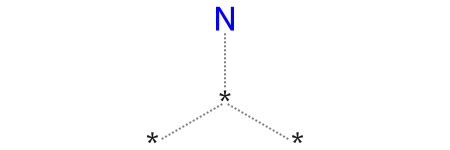

157


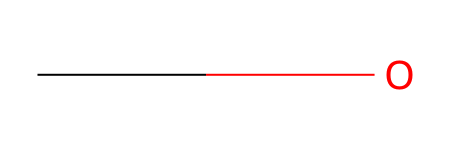

158


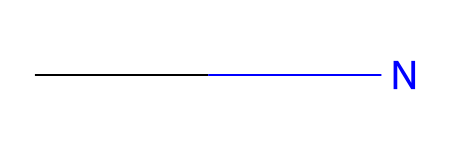

159


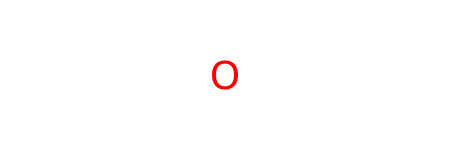

160


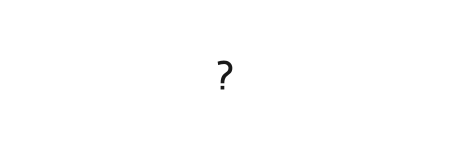

161


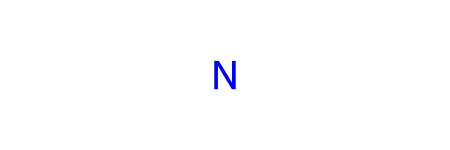

162


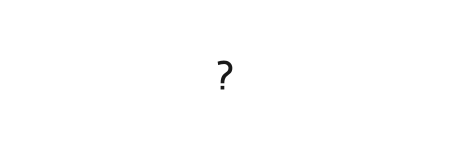

163


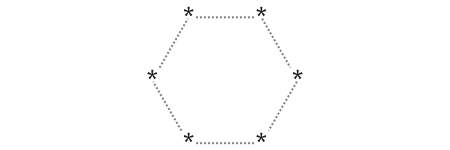

164


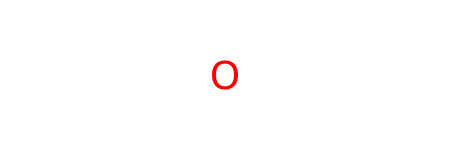

165


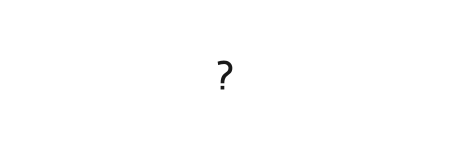

In [13]:
for i, m in mols:
    print(i)
    display(m)

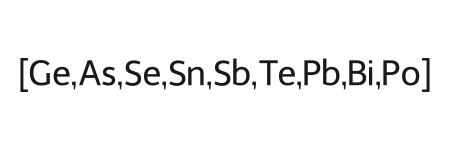

In [39]:
display(mols[1][1])

In [55]:
list(mols[0][1].GetAtoms())[0].GetSymbol()

'Rf'